In [ ]:
#Change Runtime to GPU in google colab

Setting Up GPU 

In [ ]:
!nvidia-smi

Mon Nov  7 06:02:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install pynvml
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.0
Uninstalling cffi-1.15.0:
  Successfully uninstalled cffi-1.15.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cffi-1.15.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (427 kB)
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - dask-sql
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.12


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         960 KB

The fo

In [ ]:
import urllib.request
url = "https://www.kaggle.com/datasets/zynicide/wine-reviews/download?datasetVersionNumber=4"
urllib.request.urlretrieve(url, "winemag-data_first150k.csv")

('winemag-data_first150k.csv', <http.client.HTTPMessage at 0x7fedc62f6a10>)

Uploading Data 

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%load_ext google.colab.data_table

In [ ]:
project_id = 'datamining-364220'

In [ ]:
!gcloud config list

[component_manager]
disable_update_check = True
[core]
account = jaswanth.karangula@sjsu.edu

Your active configuration is: [default]


In [ ]:
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [ ]:
!gcloud config set project 'datamining-364220'

Updated property [core/project].


In [ ]:
!gcloud config list project

[core]
project = datamining-364220

Your active configuration is: [default]


In [ ]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'datamining-364220'
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

cardio_data
house_price


In [ ]:
query1 = """SELECT
  *
FROM
  `datamining-364220.cardio_data.data`

        """
dfquery = client.query(query1)

In [ ]:
data=dfquery.to_dataframe()
data.head(10)
data.drop[0]

,int64_field_0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22723,64.0,1,55,81.0,130,90,1,1,0,0,1,1
1,66643,51.6,1,57,61.0,130,90,1,1,0,0,1,1
2,64115,50.4,1,59,57.6,125,67,1,1,0,0,0,0
3,29157,52.3,1,60,69.0,110,70,1,1,0,0,0,0
4,27603,57.4,1,64,61.0,130,70,1,1,0,0,1,0
5,44490,52.3,1,65,60.0,120,80,1,1,0,0,1,0
6,33607,54.0,0,65,72.0,130,80,1,1,0,0,0,0
7,64454,58.4,1,66,63.0,12,80,1,1,0,0,0,1
8,50789,39.7,0,67,60.0,110,80,1,1,1,1,1,0
9,14323,60.2,1,67,57.0,120,90,1,1,0,0,1,1


In [ ]:
data.drop(0)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,51.6,1,57,61.0,130,90,1,1,0,0,1,1
2,50.4,1,59,57.6,125,67,1,1,0,0,0,0
3,52.3,1,60,69.0,110,70,1,1,0,0,0,0
4,57.4,1,64,61.0,130,70,1,1,0,0,1,0
5,52.3,1,65,60.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,61.6,0,198,79.0,160,100,1,1,1,0,0,1
69996,45.6,1,198,75.0,170,100,2,1,0,1,1,1
69997,52.5,0,200,100.0,170,1100,2,2,0,0,1,1
69998,52.2,0,207,78.0,100,70,1,1,0,1,1,0


Import All Sklearn libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import os

import time

import sklearn.neighbors
import sklearn.svm
import sklearn.ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 

Import all Rapid Libs

In [ ]:
import cudf
import cuml
from cuml import LogisticRegression as cLogisticRegression
from cuml.neighbors import KNeighborsClassifier as cKNeighborsClassifier
from cuml import SVC as cSVC
from cuml.linear_model import Lasso as cLasso
from cuml.manifold import TSNE as cTSNE
from cuml import DBSCAN as cDBSCAN
from cuml.decomposition import PCA as cPCA
from cuml.ensemble import RandomForestClassifier as cRandomForestClassifier

Data Preprocessing

In [ ]:
data.age = np.round(data.age/365.25,decimals=1)
data.gender = data.gender.replace(2,0)
data.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.2,1,55,81.0,130,90,1,1,0,0,1,1
1,0.1,1,57,61.0,130,90,1,1,0,0,1,1
2,0.1,1,59,57.6,125,67,1,1,0,0,0,0
3,0.1,1,60,69.0,110,70,1,1,0,0,0,0
4,0.2,1,64,61.0,130,70,1,1,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


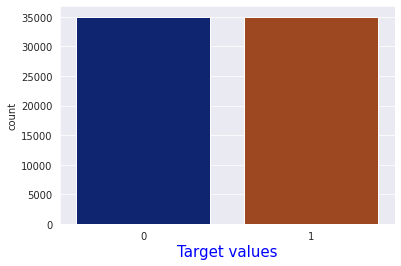

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data.cardio,palette='dark')
plt.xlabel('Target values',fontdict={'fontsize': 15,'color':'Blue'},labelpad=3);

Train Test Split

In [ ]:
y = data.cardio.values
x = data.drop(['cardio'],axis = 1 )
x_train , x_test ,y_train , y_test =train_test_split(x , y  , test_size = 0.2 , random_state = 42 )
X_cpu = pd.DataFrame(x_train)
Y_cpu = pd.DataFrame(y_train).astype("int32")

X_gpu = cudf.from_pandas(X_cpu)
Y_gpu = cudf.from_pandas(Y_cpu)

In [ ]:
ITERATION = 2
NFOLDS = 5

In [ ]:
def bench(X, y, classifiers, params):
    elapsed = {}
    for name, clf_class in classifiers.items():
        elapsed_list = []

        for _ in range(ITERATION):
            kf = KFold(n_splits=NFOLDS)
            clf = clf_class()
            clf.set_params(**params[name])

            elapsed_sum = 0
            for i, (train_idx, val_idx) in enumerate(kf.split(X, y)):
                X_train = X_cpu.iloc[train_idx]
                y_train = Y_cpu.iloc[train_idx]
                X_val = X_cpu.iloc[val_idx]
                y_val = Y_cpu.iloc[val_idx]

                start = time.time()
                clf.fit(X_train, y_train)
                elapsed_sum += time.time() - start

            elapsed_list.append(elapsed_sum)

        elapsed[name] = pd.Series(elapsed_list).mean()
    return elapsed

In [ ]:
classifiers = {
    "KNN": sklearn.neighbors.KNeighborsClassifier,
    "SVM": sklearn.svm.SVC,
    "RandomForest": sklearn.ensemble.RandomForestClassifier
}

params = {
    "KNN": {},
    "SVM": {
        "random_state": 47
    },
    "RandomForest": {
        "n_estimators": 100,
        "random_state": 47
    }
}

elapsed_sklearn = bench(X_cpu, Y_cpu, classifiers, params)

/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [37]:
elapsed_sklearn

{'KNN': 0.38519883155822754,
 'SVM': 526.2775363922119,
 'RandomForest': 17.87536895275116}

In [38]:
classifiers = { "KNN": cuml.neighbors.KNeighborsClassifier, "SVM": cuml.svm.SVC, "RandomForest": cuml.ensemble.RandomForestClassifier }

params = { "KNN": {}, "SVM": {}, "RandomForest": { "n_estimators": 100 } }

elapsed_cuml = bench(X_gpu, Y_gpu, classifiers, params)

/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


In [39]:
elapsed_cuml

{'KNN': 1.8432966470718384,
 'SVM': 14.757538557052612,
 'RandomForest': 2.5625743865966797}

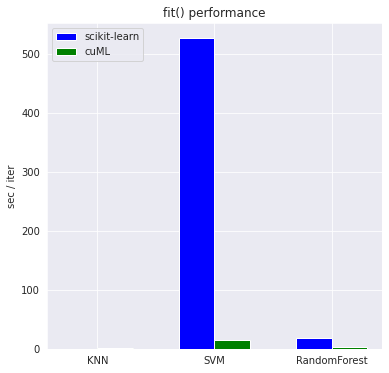

In [40]:
left = np.arange(len(elapsed_sklearn.keys()))
width = 0.3

fig = plt.figure(figsize=(6, 6))
fig.patch.set_alpha(1)

plt.subplot(1, 1, 1)

plt.bar(left, elapsed_sklearn.values(), color='b', width=width, label="scikit-learn", align="center")
plt.bar(left + width, elapsed_cuml.values(), color="g", width=width, label="cuML", align="center")

plt.xticks(left + width / 2, elapsed_sklearn.keys())
plt.legend(loc=2)
plt.ylabel("sec / iter")
plt.title("fit() performance")
plt.show()


In [41]:
plt.s